In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

In [13]:
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1

IMAGE_DIRECTORY = "Presentation_Data/set2/dataset"
CLASS_NAMES = ['lower_0', 'lower_1', 'lower_2', 'lower_3', 'lower_4',
'lower_5', 'lower_6', 'lower_7', 'lower_8', 'lower_9', 'lower_a',
'lower_b', 'lower_d', 'lower_e', 'lower_f', 'lower_g', 'lower_h',
'lower_n', 'lower_q', 'lower_r', 'lower_t', 'upper_A', 'upper_B',
'upper_C', 'upper_D', 'upper_E', 'upper_F', 'upper_G', 'upper_H',
'upper_I', 'upper_J', 'upper_K', 'upper_L', 'upper_M', 'upper_N',
'upper_O', 'upper_P', 'upper_Q', 'upper_R', 'upper_S', 'upper_T',
'upper_U', 'upper_V', 'upper_W', 'upper_X', 'upper_Y', 'upper_Z']

load_me = tf.keras.preprocessing.image_dataset_from_directory(
    IMAGE_DIRECTORY,
    labels="inferred",
    label_mode="categorical",   # one-hot encoding stuff
    image_size=(28, 28),
    color_mode="grayscale",
    shuffle=False,              # These are testing images, shuffling only complicates things
    class_names=CLASS_NAMES,    # Make sure that even if some labels aren't included they still match
    batch_size=1,               # These are testing images, don't care about batches
)

# Normalize them before anything else happens
def normalize(image, label):
	image = tf.cast(image, tf.float32) / 255.0
	return image, label

dataset = load_me.map(normalize)

Found 1880 files belonging to 47 classes.


In [14]:
# Now load in the model
MODEL_FILE = "Testing/model_results/model_v9_correct_batch_normal.keras"
model = tf.keras.models.load_model(MODEL_FILE)

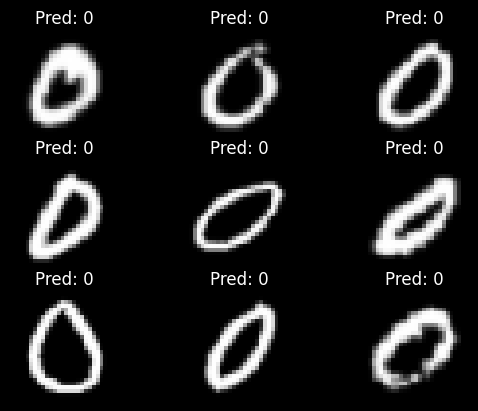

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Draw out some images

for index, (image, label) in enumerate(dataset.take(9)):
    plt.subplot(331 + index)
    plt.imshow(image[0], cmap=plt.get_cmap("gray"))
    true_label = np.argmax(label[0])
    plt.title(f"Pred: {true_label}")
    plt.axis('off')
plt.show()

In [17]:
# Make predictions
predictions = model.predict(dataset)
predicted_classes = [CLASS_NAMES[np.argmax(label)] for label in predictions]

   1/1880 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step

1880/1880 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [18]:
results = model.evaluate(dataset)
print("Loss and Metrics:", results)

1880/1880 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8925 - loss: 0.3141
Loss and Metrics: [0.308347225189209, 0.8840425610542297]


In [ ]:
# from sklearn.metrics import classification_report

# # Generate a classification report
# report = classification_report(dataset, predictions)

ValueError: Expected array-like (array or non-string sequence), got <_MapDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 47), dtype=tf.float32, name=None))>